In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 38s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 12s 3us/step


In [41]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.layers import BatchNormalization


In [5]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [6]:
('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))


('Testing data shape : ', (10000, 28, 28), (10000,))

In [7]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

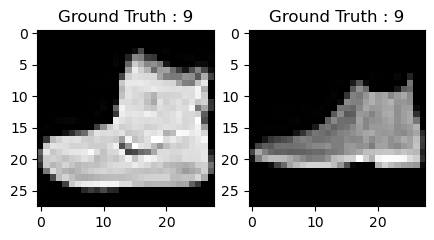

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [15]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [17]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [19]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [20]:
batch_size = 64
epochs = 20
num_classes = 10


In [23]:

# Assuming num_classes is defined
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [27]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

fashion_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
fashion_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 28, 28, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ leaky_re_lu (LeakyReLU)            │ (None, 28, 28, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 14, 14, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 14, 14, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ leaky_re_lu_1 (LeakyReLU)          │ (None, 14, 14, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 7, 7, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)                  │ (None, 7, 7, 128)             │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ leaky_re_lu_2 (LeakyReLU)          │ (None, 7, 7, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 4, 4, 128)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 2048)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 128)                   │     262,272 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ leaky_re_lu_3 (LeakyReLU)          │ (None, 128)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7504 - loss: 0.6858 - val_accuracy: 0.8744 - val_loss: 0.3520
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8883 - loss: 0.3054 - val_accuracy: 0.9000 - val_loss: 0.2734
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9100 - loss: 0.2435 - val_accuracy: 0.9076 - val_loss: 0.2492
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 104s 48ms/step - accuracy: 0.9231 - loss: 0.2103 - val_accuracy: 0.9109 - val_loss: 0.2468
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9344 - loss: 0.1794 - val_accuracy: 0.9168 - val_loss: 0.2299
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9406 - loss: 0.1580 - val_accuracy: 0.9134 - val_loss: 0.2432
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9490 - loss: 0.1346 - val_accuracy: 0.9190 - val_loss: 0.2309
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9570 - loss: 0.1142 -

In [29]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [30]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.46164530515670776
Test accuracy: 0.9205999970436096


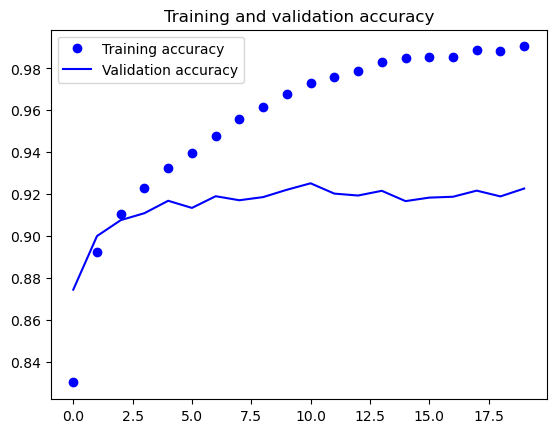

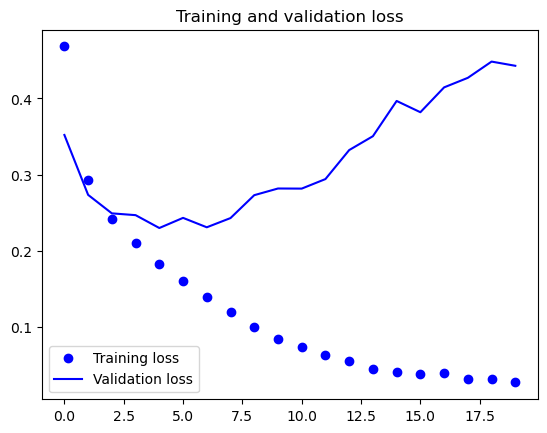

In [33]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [36]:
batch_size = 64
epochs = 20
num_classes = 10


In [42]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [43]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [44]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.6688 - loss: 0.8867 - val_accuracy: 0.8734 - val_loss: 0.3559
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8562 - loss: 0.3943 - val_accuracy: 0.8916 - val_loss: 0.3074
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8764 - loss: 0.3334 - val_accuracy: 0.8841 - val_loss: 0.3016
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8877 - loss: 0.3011 - val_accuracy: 0.9013 - val_loss: 0.2686
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.8962 - loss: 0.2811 - val_accuracy: 0.9028 - val_loss: 0.2592
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9001 - loss: 0.2692 - val_accuracy: 0.9092 - val_loss: 0.2422
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9055 - loss: 0.2536 - val_accuracy: 0.9147 - val_loss: 0.2321
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9075 - loss: 0.2462 - 

In [46]:

fashion_model.save("fashion_model_dropout.keras")


In [47]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9223 - loss: 0.2196
Test loss: 0.21768103539943695
Test accuracy: 0.9225999712944031


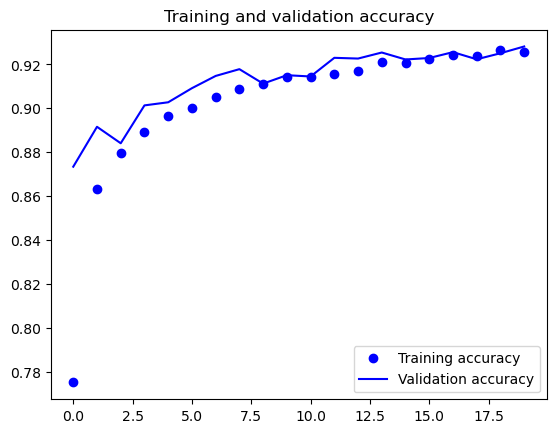

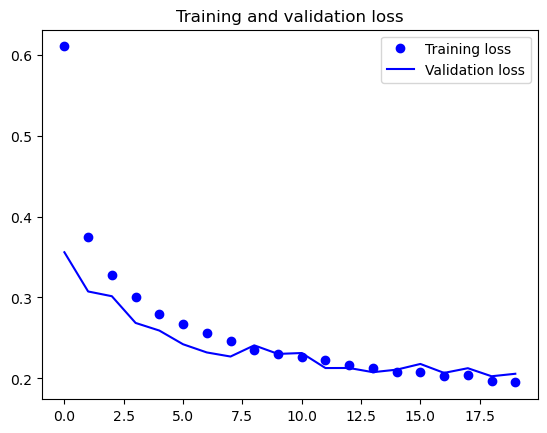

In [49]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [50]:
predicted_classes = fashion_model.predict(test_X)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [51]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [52]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9198 correct labels


C:\Users\DELL\AppData\Local\Temp\ipykernel_372\3168532051.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_372\3168532051.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


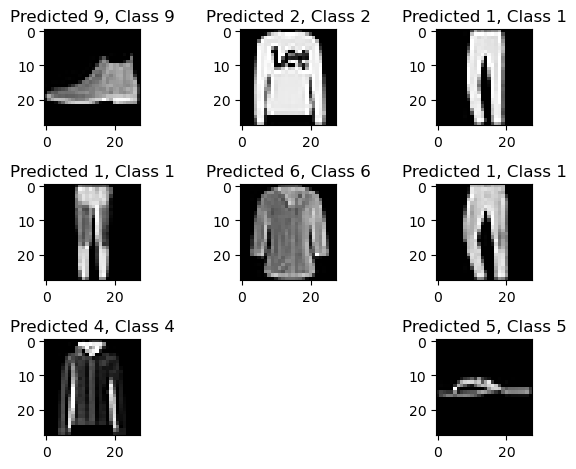

In [54]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()


Found 802 incorrect labels


C:\Users\DELL\AppData\Local\Temp\ipykernel_372\1119739400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_372\1119739400.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


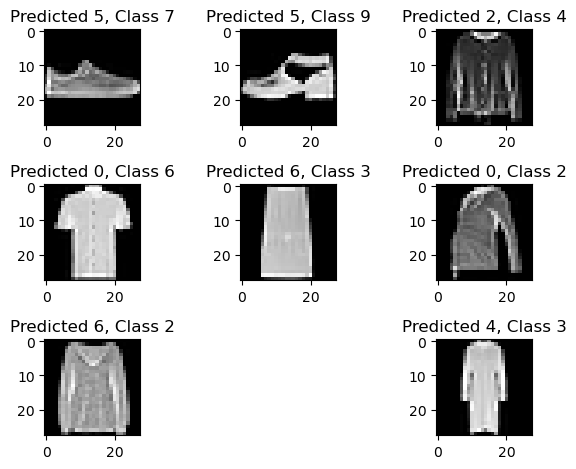

In [56]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print( "Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [57]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.80      0.91      0.85      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.87      0.89      1000
     Class 3       0.94      0.91      0.92      1000
     Class 4       0.88      0.87      0.88      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.79      0.75      0.77      1000
     Class 7       0.97      0.96      0.96      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

